In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import defaultdict, Counter
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


In [18]:
# Load the three CSV files
communications_df = pd.read_csv('communication_network.csv')
employee_metrics_df = pd.read_csv('employee_metrics.csv')
employees_df = pd.read_csv('employee_directory.csv')

# Display basic information
print("=" * 80)
print("COMMUNICATION NETWORK DATA")
print("=" * 80)
print(f"Shape: {communications_df.shape}")
print(f"\nColumns: {communications_df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(communications_df.head())

print("\n" + "=" * 80)
print("EMPLOYEE METRICS DATA")
print("=" * 80)
print(f"Shape: {employee_metrics_df.shape}")
print(f"\nFirst 5 rows:")
print(employee_metrics_df.head())

print("\n" + "=" * 80)
print("EMPLOYEE DIRECTORY")
print("=" * 80)
print(f"Shape: {employees_df.shape}")
print(f"\nFirst 5 rows:")
print(employees_df.head())


COMMUNICATION NETWORK DATA
Shape: (4747, 17)

Columns: ['communication_id', 'date', 'time', 'sender_id', 'sender_name', 'sender_dept', 'sender_team', 'receiver_id', 'receiver_name', 'receiver_dept', 'receiver_team', 'channel', 'duration_minutes', 'sentiment', 'topic', 'response_time_hours', 'cross_dept_communication']

First 5 rows:
   communication_id        date   time  sender_id   sender_name  sender_dept  \
0                 1  2025-11-01  14:10         19   Employee_19  Engineering   
1                 2  2025-11-01  12:35        138  Employee_138   Operations   
2                 3  2025-11-01  10:21         63   Employee_63    Marketing   
3                 4  2025-11-01  15:43        136  Employee_136   Operations   
4                 5  2025-11-01  12:32         68   Employee_68    Marketing   

    sender_team  receiver_id receiver_name receiver_dept receiver_team  \
0            QA           20   Employee_20   Engineering            QA   
1  Supply Chain          140  Employ

In [19]:
# Check for missing values
print("Missing Values in Communications Data:")
print(communications_df.isnull().sum())

print("\n\nMissing Values in Employee Metrics:")
print(employee_metrics_df.isnull().sum())

# Data type conversion
communications_df['date'] = pd.to_datetime(communications_df['date'])
communications_df['response_time_hours'] = communications_df['response_time_hours'].astype(int)

# Create a merged dataset with employee info
communications_enhanced = communications_df.copy()
communications_enhanced['sender_seniority'] = communications_enhanced['sender_id'].map(
    employees_df.set_index('employee_id')['seniority_level']
)
communications_enhanced['receiver_seniority'] = communications_enhanced['receiver_id'].map(
    employees_df.set_index('employee_id')['seniority_level']
)

print(f"\nData cleaning completed!")
print(f"Communication records: {len(communications_df)}")
print(f"Date range: {communications_df['date'].min()} to {communications_df['date'].max()}")
print(f"Total unique employees: {len(employees_df)}")
print(f"Total departments: {employees_df['department'].nunique()}")


Missing Values in Communications Data:
communication_id            0
date                        0
time                        0
sender_id                   0
sender_name                 0
sender_dept                 0
sender_team                 0
receiver_id                 0
receiver_name               0
receiver_dept               0
receiver_team               0
channel                     0
duration_minutes            0
sentiment                   0
topic                       0
response_time_hours         0
cross_dept_communication    0
dtype: int64


Missing Values in Employee Metrics:
employee_id                  0
employee_name                0
department                   0
team                         0
total_communications         0
intra_dept_communications    0
cross_dept_communications    0
dept_diversity_contacts      0
avg_sentiment_score          0
collaboration_breadth        0
silo_propensity_score        0
dtype: int64

Data cleaning completed!
Communication record

In [20]:
# Department and team breakdown
dept_counts = employees_df['department'].value_counts().sort_values(ascending=False)
print("=" * 80)
print("DEPARTMENT BREAKDOWN")
print("=" * 80)
print(dept_counts)

# Team breakdown within departments
print("\n" + "=" * 80)
print("TEAMS WITHIN DEPARTMENTS")
print("=" * 80)
for dept in employees_df['department'].unique():
    teams = employees_df[employees_df['department'] == dept]['team'].unique()
    print(f"\n{dept}: {len(teams)} teams")
    for team in teams:
        count = len(employees_df[(employees_df['department'] == dept) & (employees_df['team'] == team)])
        print(f"  - {team}: {count} employees")

# Seniority distribution
print("\n" + "=" * 80)
print("SENIORITY DISTRIBUTION")
print("=" * 80)
print(employees_df['seniority_level'].value_counts())


DEPARTMENT BREAKDOWN
department
Sales          34
Marketing      29
Finance        25
HR             22
Engineering    21
Operations     21
Name: count, dtype: int64

TEAMS WITHIN DEPARTMENTS

Engineering: 4 teams
  - Backend: 6 employees
  - DevOps: 5 employees
  - Frontend: 3 employees
  - QA: 7 employees

Sales: 3 teams
  - Partnerships: 13 employees
  - Enterprise: 13 employees
  - SMB: 8 employees

Marketing: 3 teams
  - Analytics: 16 employees
  - Campaigns: 5 employees
  - Content: 8 employees

Finance: 3 teams
  - Planning: 8 employees
  - Accounting: 10 employees
  - Treasury: 7 employees

HR: 3 teams
  - Development: 4 employees
  - Recruiting: 12 employees
  - Operations: 6 employees

Operations: 3 teams
  - Procurement: 6 employees
  - Supply Chain: 5 employees
  - Facilities: 10 employees

SENIORITY DISTRIBUTION
seniority_level
Senior     45
Junior     41
Lead       38
Manager    28
Name: count, dtype: int64


In [21]:
# Overall communication statistics
print("=" * 80)
print("COMMUNICATION STATISTICS")
print("=" * 80)
print(f"Total communications: {len(communications_df)}")
print(f"Date range: {communications_df['date'].min().date()} to {communications_df['date'].max().date()}")
print(f"Average communications per day: {len(communications_df) / communications_df['date'].nunique():.1f}")

# Communication by channel
print("\n\nCommunications by Channel:")
channel_dist = communications_df['channel'].value_counts()
print(channel_dist)
print(f"\nChannel percentages:")
print((channel_dist / len(communications_df) * 100).round(2))

# Sentiment distribution
print("\n\nSentiment Distribution:")
sentiment_dist = communications_df['sentiment'].value_counts()
print(sentiment_dist)
print(f"\nSentiment percentages:")
print((sentiment_dist / len(communications_df) * 100).round(2))

# Cross-department vs intra-department
print("\n\nIntra-Department vs Cross-Department Communications:")
cross_dept = communications_df['cross_dept_communication'].value_counts()
intra_dept_count = cross_dept.get(0, 0)
cross_dept_count = cross_dept.get(1, 0)
total_communications = len(communications_df)

print(f"Intra-department: {intra_dept_count} ({intra_dept_count/total_communications*100:.1f}%) \nCross-department: {cross_dept_count} ({cross_dept_count/total_communications*100:.1f}%) ")

COMMUNICATION STATISTICS
Total communications: 4747
Date range: 2025-11-01 to 2025-11-30
Average communications per day: 158.2


Communications by Channel:
channel
Slack      1686
Email      1408
Teams       935
Meeting     461
Phone       257
Name: count, dtype: int64

Channel percentages:
channel
Slack      35.52
Email      29.66
Teams      19.70
Meeting     9.71
Phone       5.41
Name: count, dtype: float64


Sentiment Distribution:
sentiment
Positive    2844
Neutral     1423
Negative     480
Name: count, dtype: int64

Sentiment percentages:
sentiment
Positive    59.91
Neutral     29.98
Negative    10.11
Name: count, dtype: float64


Intra-Department vs Cross-Department Communications:
Intra-department: 3277 (69.0%) 
Cross-department: 1470 (31.0%) 


In [22]:
# Department-level analysis
department_silo_metrics = []

for dept in employees_df['department'].unique():
    dept_employees = employees_df[employees_df['department'] == dept]['employee_id'].tolist()

    # Get all communications from/to this department
    dept_comms = communications_df[
        (communications_df['sender_id'].isin(dept_employees)) |
        (communications_df['receiver_id'].isin(dept_employees))
    ]

    # Intra-department communications
    intra_dept = communications_df[
        (communications_df['sender_id'].isin(dept_employees)) &
        (communications_df['receiver_id'].isin(dept_employees))
    ]

    # Cross-department communications
    cross_dept = dept_comms[
        (dept_comms['sender_id'].isin(dept_employees)) !=
        (dept_comms['receiver_id'].isin(dept_employees))
    ]

    # Calculate metrics
    total_comms = len(dept_comms)
    intra_count = len(intra_dept)
    cross_count = len(cross_dept)

    silo_score = (intra_count / total_comms * 100) if total_comms > 0 else 0
    collaboration_index = (cross_count / total_comms) if total_comms > 0 else 0

    # Sentiment in cross-department communications
    cross_sentiment_positive = (cross_dept['sentiment'] == 'Positive').sum() / len(cross_dept) if len(cross_dept) > 0 else 0

    department_silo_metrics.append({
        'department': dept,
        'num_employees': len(dept_employees),
        'total_communications': total_comms,
        'intra_dept_communications': intra_count,
        'cross_dept_communications': cross_count,
        'silo_score': round(silo_score, 2),
        'collaboration_index': round(collaboration_index, 3),
        'cross_dept_positive_sentiment': round(cross_sentiment_positive, 3),
        'avg_response_time_hours': round(dept_comms['response_time_hours'].mean(), 2)
    })

dept_metrics_df = pd.DataFrame(department_silo_metrics).sort_values('silo_score', ascending=False)

print("=" * 100)
print("DEPARTMENT-LEVEL SILO ANALYSIS")
print("=" * 100)
print(dept_metrics_df.to_string(index=False))

print("\n\nInterpretation:")
print("- Silo Score: % of intra-department communications (higher = more siloed)")
print("- Collaboration Index: % of cross-department communications (higher = more collaborative)")
print("- Cross-dept Positive Sentiment: Quality of inter-departmental relationships")


DEPARTMENT-LEVEL SILO ANALYSIS
 department  num_employees  total_communications  intra_dept_communications  cross_dept_communications  silo_score  collaboration_index  cross_dept_positive_sentiment  avg_response_time_hours
Engineering             21                   847                        508                        339       59.98                0.400                          0.569                    10.27
  Marketing             29                  1058                        620                        438       58.60                0.414                          0.566                    10.49
      Sales             34                  1270                        736                        534       57.95                0.420                          0.596                    10.66
    Finance             25                   950                        545                        405       57.37                0.426                          0.593                    10.28
 Operatio

In [23]:
# Team-level silo analysis
team_silo_metrics = []

for dept in employees_df['department'].unique():
    for team in employees_df[employees_df['department'] == dept]['team'].unique():
        team_employees = employees_df[
            (employees_df['department'] == dept) &
            (employees_df['team'] == team)
        ]['employee_id'].tolist()

        # Get communications
        team_comms = communications_df[
            (communications_df['sender_id'].isin(team_employees)) |
            (communications_df['receiver_id'].isin(team_employees))
        ]

        intra_team = communications_df[
            (communications_df['sender_id'].isin(team_employees)) &
            (communications_df['receiver_id'].isin(team_employees))
        ]

        total = len(team_comms)
        intra = len(intra_team)
        silo_score = (intra / total * 100) if total > 0 else 0

        team_silo_metrics.append({
            'department': dept,
            'team': team,
            'num_members': len(team_employees),
            'total_communications': total,
            'intra_team_percentage': round(silo_score, 2),
            'collaboration_breadth': round((total - intra) / total, 3) if total > 0 else 0
        })

team_metrics_df = pd.DataFrame(team_silo_metrics).sort_values('intra_team_percentage', ascending=False)

print("=" * 100)
print("TOP 15 MOST SILOED TEAMS")
print("=" * 100)
print(team_metrics_df.head(15).to_string(index=False))

print("\n\n" + "=" * 100)
print("TOP 10 MOST COLLABORATIVE TEAMS")
print("=" * 100)
print(team_metrics_df.nsmallest(10, 'intra_team_percentage').to_string(index=False))


TOP 15 MOST SILOED TEAMS
 department         team  num_members  total_communications  intra_team_percentage  collaboration_breadth
  Marketing    Analytics           16                   730                  24.52                  0.755
         HR   Recruiting           12                   572                  24.13                  0.759
 Operations   Facilities           10                   495                  20.20                  0.798
    Finance   Accounting           10                   486                  19.14                  0.809
      Sales   Enterprise           13                   667                  16.94                  0.831
Engineering           QA            7                   398                  15.58                  0.844
      Sales Partnerships           13                   664                  15.21                  0.848
    Finance     Planning            8                   441                  13.61                  0.864
Engineering       Dev

In [24]:
# Create network graph
G = nx.DiGraph()

# Add nodes (employees)
for _, employee in employees_df.iterrows():
    G.add_node(
        employee['employee_id'],
        name=employee['name'],
        department=employee['department'],
        team=employee['team'],
        seniority=employee['seniority_level']
    )

# Add edges (communications)
for _, comm in communications_df.iterrows():
    if G.has_edge(comm['sender_id'], comm['receiver_id']):
        # Increment weight if edge exists
        G[comm['sender_id']][comm['receiver_id']]['weight'] += 1
        G[comm['sender_id']][comm['receiver_id']]['interactions'].append({
            'channel': comm['channel'],
            'sentiment': comm['sentiment'],
            'topic': comm['topic']
        })
    else:
        # Create new edge
        G.add_edge(
            comm['sender_id'],
            comm['receiver_id'],
            weight=1,
            interactions=[{
                'channel': comm['channel'],
                'sentiment': comm['sentiment'],
                'topic': comm['topic']
            }]
        )

print("=" * 80)
print("COMMUNICATION NETWORK GRAPH PROPERTIES")
print("=" * 80)
print(f"Number of nodes (employees): {G.number_of_nodes()}")
print(f"Number of edges (communication links): {G.number_of_edges()}")
print(f"Network density: {round(nx.density(G), 4)}")
print(f"Average clustering coefficient: {round(nx.average_clustering(nx.to_undirected(G)), 4)}")

# Calculate network statistics
undirected_G = nx.to_undirected(G)
print(f"Network is connected: {nx.is_connected(undirected_G)}")
print(f"Number of connected components: {nx.number_connected_components(undirected_G)}")

# Get degree statistics
degrees = [G.degree(node, weight='weight') for node in G.nodes()]
print(f"\nDegree Statistics (weighted):")
print(f"  Average: {np.mean(degrees):.2f}")
print(f"  Min: {np.min(degrees):.2f}")
print(f"  Max: {np.max(degrees):.2f}")


COMMUNICATION NETWORK GRAPH PROPERTIES
Number of nodes (employees): 253
Number of edges (communication links): 3653
Network density: 0.0573
Average clustering coefficient: 0.2711
Network is connected: True
Number of connected components: 1

Degree Statistics (weighted):
  Average: 37.53
  Min: 1.00
  Max: 79.00


In [25]:
# Convert to undirected for community detection
undirected_G = nx.to_undirected(G)

# Detect communities using Louvain method
try:
    import community.community_louvain as community_louvain
    communities = community_louvain.best_partition(undirected_G, weight='weight')
except:
    # Alternative: Use greedy modularity communities
    from networkx.algorithms import community
    communities_obj = list(community.greedy_modularity_communities(undirected_G, weight='weight'))
    communities = {}
    for idx, comm_set in enumerate(communities_obj):
        for node in comm_set:
            communities[node] = idx

# Create community analysis
community_analysis = []
# Create a set of valid employee_ids for efficient lookup
valid_employee_ids = set(employees_df['employee_id'].unique())

for emp_id, comm_id in communities.items():
    # Only process employees that are in the employees_df
    if emp_id in valid_employee_ids:
        emp_info_row = employees_df[employees_df['employee_id'] == emp_id].iloc[0]
        community_analysis.append({
            'employee_id': emp_id,
            'employee_name': emp_info_row['name'],
            'department': emp_info_row['department'],
            'team': emp_info_row['team'],
            'community_id': comm_id
        })
    # else:
        # print(f"Warning: Employee ID {emp_id} from network communities not found in employee directory and will be skipped.")

community_df = pd.DataFrame(community_analysis)

print("=" * 80)
print("NETWORK COMMUNITIES DETECTED")
print("=" * 80)
print(f"Total communities: {len(set(communities.values()))}")

# Community-to-department mapping
print("\nCommunity Composition:")
for comm_id in sorted(set(communities.values())):
    comm_members = community_df[community_df['community_id'] == comm_id]
    print(f"\nCommunity {comm_id}: {len(comm_members)} members")
    print(f"  Departments: {', '.join(comm_members['department'].unique())}")
    dept_dist = comm_members['department'].value_counts()
    for dept, count in dept_dist.items():
        print(f"    - {dept}: {count}")

NETWORK COMMUNITIES DETECTED
Total communities: 6

Community Composition:

Community 0: 21 members
  Departments: Operations
    - Operations: 21

Community 1: 29 members
  Departments: Marketing
    - Marketing: 29

Community 2: 34 members
  Departments: Sales
    - Sales: 34

Community 3: 21 members
  Departments: Engineering
    - Engineering: 21

Community 4: 25 members
  Departments: Finance
    - Finance: 25

Community 5: 22 members
  Departments: HR
    - HR: 22


In [29]:
# Analyze sentiment within and across departments
sentiment_analysis = []

for dept in employees_df['department'].unique():
    dept_employees = employees_df[employees_df['department'] == dept]['employee_id'].tolist()

    # Intra-department sentiment
    intra_dept_comms = communications_df[
        (communications_df['sender_id'].isin(dept_employees)) &
        (communications_df['receiver_id'].isin(dept_employees))
    ]

    # Cross-department sentiment
    cross_dept_comms = communications_df[
        ((communications_df['sender_id'].isin(dept_employees)) &
         (~communications_df['receiver_id'].isin(dept_employees))) |
        ((~communications_df['sender_id'].isin(dept_employees)) &
         (communications_df['receiver_id'].isin(dept_employees)))
    ]

    # Calculate sentiment metrics
    intra_positive = (intra_dept_comms['sentiment'] == 'Positive').sum() / len(intra_dept_comms) if len(intra_dept_comms) > 0 else 0
    cross_positive = (cross_dept_comms['sentiment'] == 'Positive').sum() / len(cross_dept_comms) if len(cross_dept_comms) > 0 else 0

    intra_negative = (intra_dept_comms['sentiment'] == 'Negative').sum() / len(intra_dept_comms) if len(intra_dept_comms) > 0 else 0
    cross_negative = (cross_dept_comms['sentiment'] == 'Negative').sum() / len(cross_dept_comms) if len(cross_dept_comms) > 0 else 0

    sentiment_analysis.append({
        'department': dept,
        'intra_dept_positive_%': round(intra_positive * 100, 2),
        'intra_dept_negative_%': round(intra_negative * 100, 2),
        'cross_dept_positive_%': round(cross_positive * 100, 2),
        'cross_dept_negative_%': round(cross_negative * 100, 2),
        'sentiment_friction_index': round(cross_negative - intra_negative, 3)
    })

sentiment_df = pd.DataFrame(sentiment_analysis).sort_values('sentiment_friction_index', ascending=False)

print("=" * 100)
print("SENTIMENT ANALYSIS: INTRA vs CROSS-DEPARTMENT COMMUNICATION")
print("=" * 100)
print(sentiment_df.to_string(index=False))

print("\n\nInterpretation:")
print("- Positive % higher in intra-dept = team cohesion but potential silo indicator")
print("- Positive % lower in cross-dept = collaboration friction/barriers (silo symptom)")
print("- Sentiment Friction Index: Higher values = worse cross-dept relationships")


SENTIMENT ANALYSIS: INTRA vs CROSS-DEPARTMENT COMMUNICATION
 department  intra_dept_positive_%  intra_dept_negative_%  cross_dept_positive_%  cross_dept_negative_%  sentiment_friction_index
      Sales                  60.19                  10.46                  59.55                  11.24                     0.008
  Marketing                  63.55                   9.52                  56.62                   9.82                     0.003
    Finance                  59.08                  10.09                  59.26                  10.37                     0.003
Engineering                  59.84                   9.25                  56.93                   9.44                     0.002
         HR                  59.42                  11.53                  60.42                   9.64                    -0.019
 Operations                  56.83                  11.03                  62.50                   8.93                    -0.021


Interpretation:
- Positive %

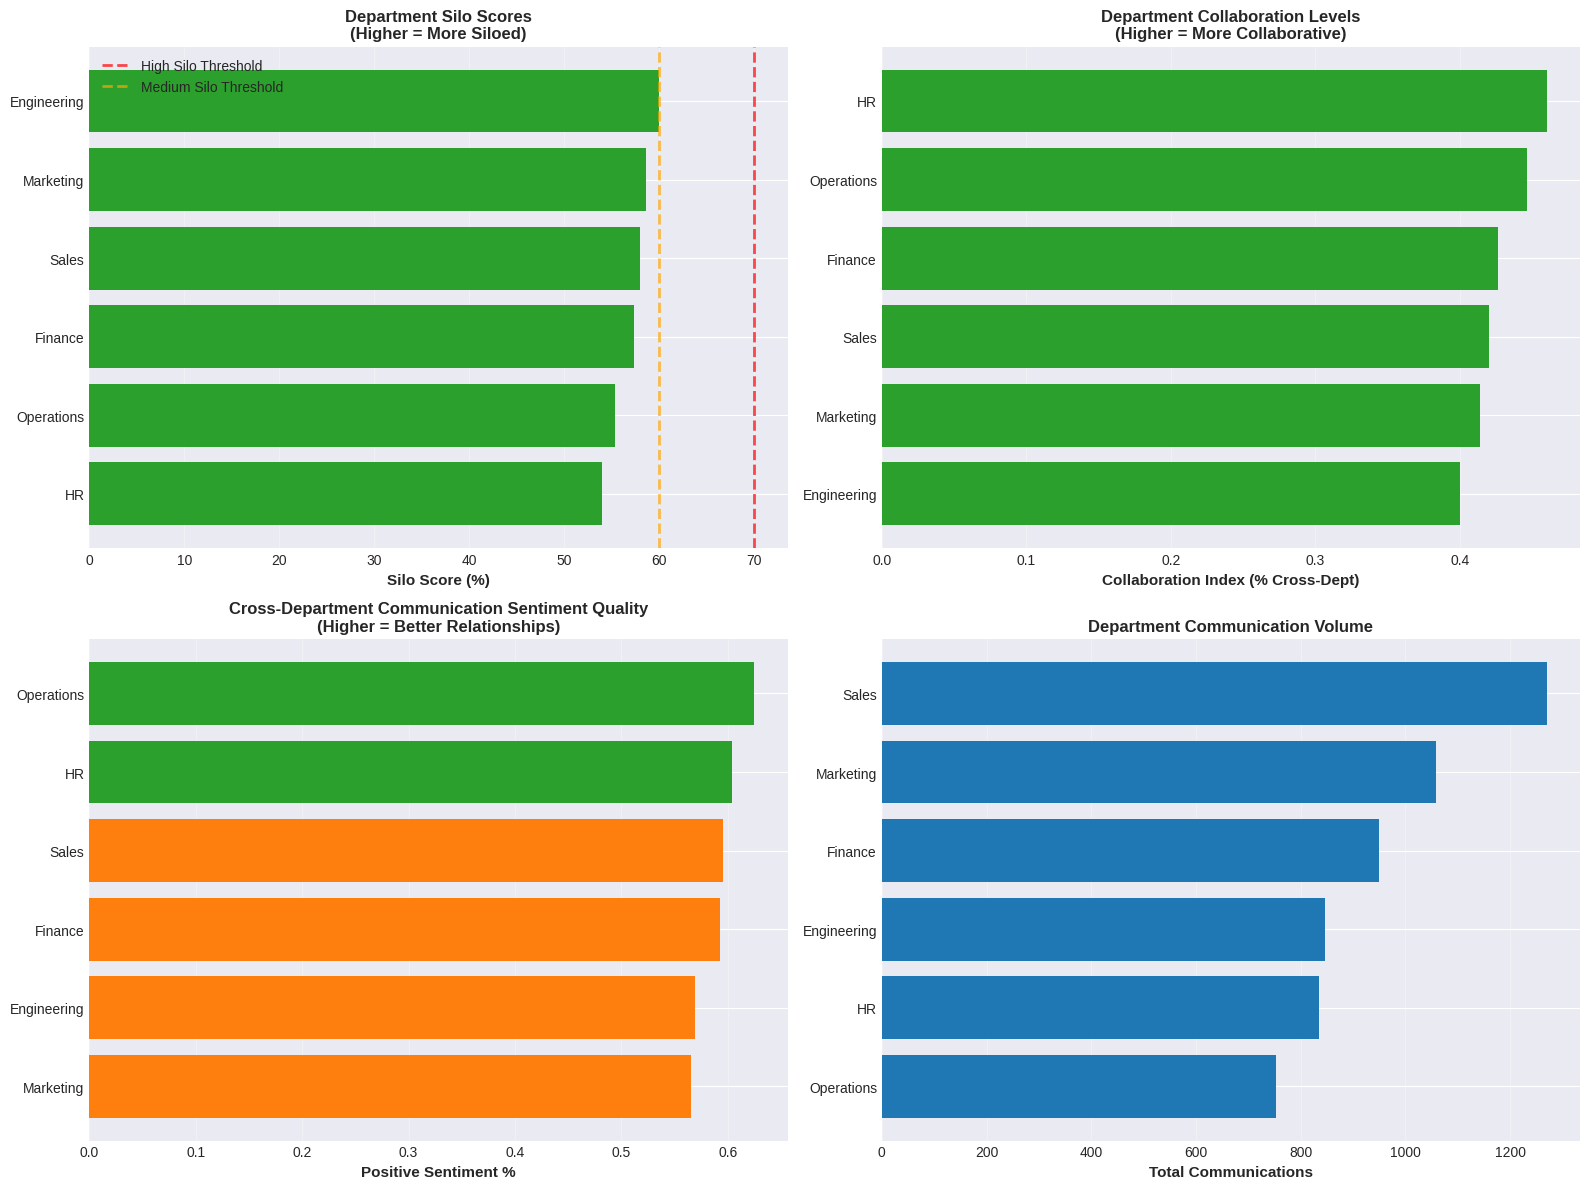

Department silo analysis visualization saved!


In [30]:
# Plot 1: Department Silo Scores
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1a: Silo Scores by Department
ax1 = axes[0, 0]
dept_metrics_sorted = dept_metrics_df.sort_values('silo_score', ascending=True)
colors = ['#d62728' if x > 70 else '#ff7f0e' if x > 60 else '#2ca02c' for x in dept_metrics_sorted['silo_score']]
ax1.barh(dept_metrics_sorted['department'], dept_metrics_sorted['silo_score'], color=colors)
ax1.set_xlabel('Silo Score (%)', fontsize=11, fontweight='bold')
ax1.set_title('Department Silo Scores\n(Higher = More Siloed)', fontsize=12, fontweight='bold')
ax1.axvline(x=70, color='red', linestyle='--', linewidth=2, alpha=0.7, label='High Silo Threshold')
ax1.axvline(x=60, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Medium Silo Threshold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Plot 1b: Collaboration Index
ax2 = axes[0, 1]
dept_collab = dept_metrics_df.sort_values('collaboration_index', ascending=True)
colors_collab = ['#2ca02c' if x > 0.35 else '#ff7f0e' if x > 0.25 else '#d62728' for x in dept_collab['collaboration_index']]
ax2.barh(dept_collab['department'], dept_collab['collaboration_index'], color=colors_collab)
ax2.set_xlabel('Collaboration Index (% Cross-Dept)', fontsize=11, fontweight='bold')
ax2.set_title('Department Collaboration Levels\n(Higher = More Collaborative)', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Plot 1c: Cross-Department Sentiment Quality
ax3 = axes[1, 0]
sentiment_sorted = dept_metrics_df.sort_values('cross_dept_positive_sentiment', ascending=True)
colors_sentiment = ['#d62728' if x < 0.5 else '#ff7f0e' if x < 0.6 else '#2ca02c' for x in sentiment_sorted['cross_dept_positive_sentiment']]
ax3.barh(sentiment_sorted['department'], sentiment_sorted['cross_dept_positive_sentiment'], color=colors_sentiment)
ax3.set_xlabel('Positive Sentiment %', fontsize=11, fontweight='bold')
ax3.set_title('Cross-Department Communication Sentiment Quality\n(Higher = Better Relationships)', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Plot 1d: Communication Volume
ax4 = axes[1, 1]
vol_sorted = dept_metrics_df.sort_values('total_communications', ascending=True)
ax4.barh(vol_sorted['department'], vol_sorted['total_communications'], color='#1f77b4')
ax4.set_xlabel('Total Communications', fontsize=11, fontweight='bold')
ax4.set_title('Department Communication Volume', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('department_silo_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Department silo analysis visualization saved!")


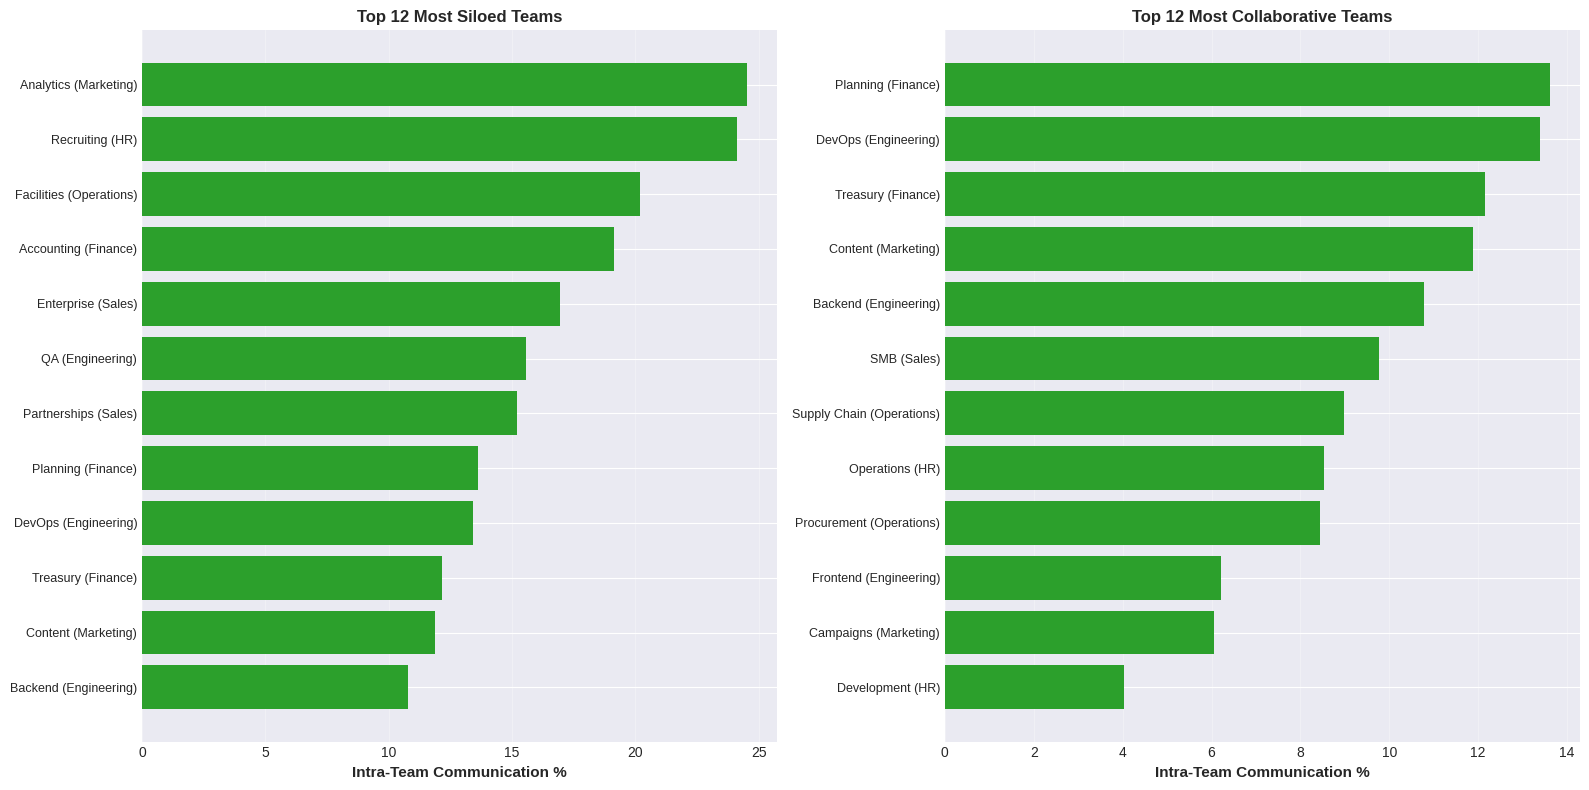

Team-level analysis visualization saved!


In [32]:
# Identify top siloed and collaborative teams
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Most Siloed Teams
ax1 = axes[0] # Corrected: Assign the first Axes object
top_siloed = team_metrics_df.head(12).sort_values('intra_team_percentage', ascending=True)
colors_siloed = ['#d62728' if x > 80 else '#ff7f0e' if x > 70 else '#2ca02c' for x in top_siloed['intra_team_percentage']]
ax1.barh(range(len(top_siloed)), top_siloed['intra_team_percentage'], color=colors_siloed)
ax1.set_yticks(range(len(top_siloed)))
ax1.set_yticklabels([f"{row['team']} ({row['department']})" for _, row in top_siloed.iterrows()], fontsize=9)
ax1.set_xlabel('Intra-Team Communication %', fontsize=11, fontweight='bold')
ax1.set_title('Top 12 Most Siloed Teams', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Most Collaborative Teams
ax2 = axes[1] # Corrected: Assign the second Axes object
top_collab = team_metrics_df.nsmallest(12, 'intra_team_percentage').sort_values('intra_team_percentage', ascending=True)
colors_collab = ['#2ca02c' if x < 50 else '#ff7f0e' if x < 65 else '#d62728' for x in top_collab['intra_team_percentage']]
ax2.barh(range(len(top_collab)), top_collab['intra_team_percentage'], color=colors_collab)
ax2.set_yticks(range(len(top_collab)))
ax2.set_yticklabels([f"{row['team']} ({row['department']})" for _, row in top_collab.iterrows()], fontsize=9)
ax2.set_xlabel('Intra-Team Communication %', fontsize=11, fontweight='bold')
ax2.set_title('Top 12 Most Collaborative Teams', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('team_level_silo_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Team-level analysis visualization saved!")

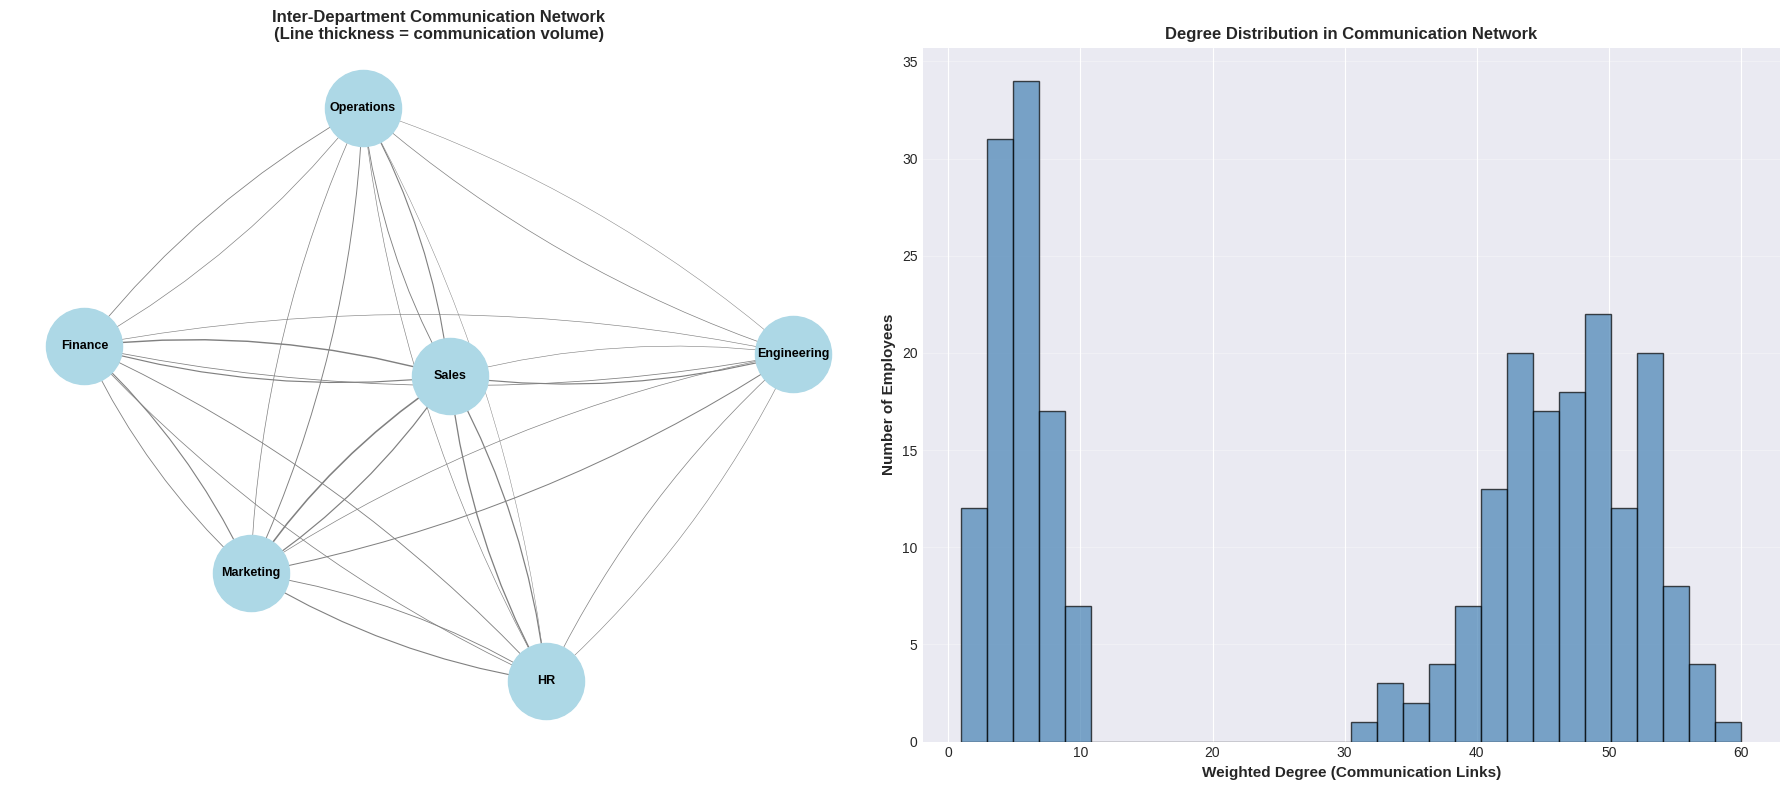

Network visualization saved!


In [34]:
# Create network visualization for departments
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Department-level network (aggregate communications)
G_dept = nx.DiGraph()

# Add department nodes and edges
dept_comms_summary = {}
for dept in employees_df['department'].unique():
    G_dept.add_node(dept)

for dept1 in employees_df['department'].unique():
    employees_1 = employees_df[employees_df['department'] == dept1]['employee_id'].tolist()
    for dept2 in employees_df['department'].unique():
        if dept1 != dept2:
            employees_2 = employees_df[employees_df['department'] == dept2]['employee_id'].tolist()
            cross_comms = len(communications_df[
                (communications_df['sender_id'].isin(employees_1)) &
                (communications_df['receiver_id'].isin(employees_2))
            ])
            if cross_comms > 0:
                G_dept.add_edge(dept1, dept2, weight=cross_comms)

# Plot 1: Department Communication Network
ax1 = axes[0] # Corrected: Assign the first Axes object
pos_dept = nx.spring_layout(G_dept, k=2, iterations=50, seed=42)
edge_widths = [G_dept[u][v]['weight'] / 50 for u, v in G_dept.edges()]
nx.draw_networkx_nodes(G_dept, pos_dept, node_color='lightblue', node_size=3000, ax=ax1)
nx.draw_networkx_labels(G_dept, pos_dept, font_size=9, font_weight='bold', ax=ax1)
nx.draw_networkx_edges(G_dept, pos_dept, width=edge_widths, edge_color='gray', arrows=True,
                       arrowsize=20, arrowstyle='->', ax=ax1, connectionstyle='arc3,rad=0.1')
ax1.set_title('Inter-Department Communication Network\n(Line thickness = communication volume)',
              fontsize=12, fontweight='bold')
ax1.axis('off')

# Plot 2: Degree distribution
ax2 = axes[1] # Corrected: Assign the second Axes object
degrees_undirected = [undirected_G.degree(n, weight='weight') for n in undirected_G.nodes()]
ax2.hist(degrees_undirected, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Weighted Degree (Communication Links)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Employees', fontsize=11, fontweight='bold')
ax2.set_title('Degree Distribution in Communication Network', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('network_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("Network visualization saved!")

In [38]:
# Analyze communication channels and topics across departments
channel_dept_analysis = []

for dept in employees_df['department'].unique():
    dept_employees = employees_df[employees_df['department'] == dept]['employee_id'].tolist()

    intra_dept_comms = communications_df[
        (communications_df['sender_id'].isin(dept_employees)) &
        (communications_df['receiver_id'].isin(dept_employees))
    ]

    cross_dept_comms = communications_df[
        ((communications_df['sender_id'].isin(dept_employees)) &
         (~communications_df['receiver_id'].isin(dept_employees))) |
        ((~communications_df['sender_id'].isin(dept_employees)) &
         (communications_df['receiver_id'].isin(dept_employees)))
    ]

    for channel in communications_df['channel'].unique():
        intra_pct = (len(intra_dept_comms[intra_dept_comms['channel'] == channel]) / len(intra_dept_comms) * 100) if len(intra_dept_comms) > 0 else 0
        cross_pct = (len(cross_dept_comms[cross_dept_comms['channel'] == channel]) / len(cross_dept_comms) * 100) if len(cross_dept_comms) > 0 else 0

        channel_dept_analysis.append({
            'department': dept,
            'channel': channel,
            'intra_dept_%': round(intra_pct, 2),
            'cross_dept_%': round(cross_pct, 2),
            'diff_%': round(cross_pct - intra_pct, 2)
        })

channel_dept_df = pd.DataFrame(channel_dept_analysis)

print("=" * 100)
print("CHANNEL USAGE: INTRA vs CROSS-DEPARTMENT")
print("=" * 100)
for dept in employees_df['department'].unique():
    print(f"\n{dept}:")
    dept_data = channel_dept_df[channel_dept_df['department'] == dept].sort_values('intra_dept_%', ascending=False)
    print(dept_data[['channel', 'intra_dept_%', 'cross_dept_%']].to_string(index=False))

# Topic analysis
print("\n\n" + "=" * 100)
print("TOPIC DISTRIBUTION IN COMMUNICATIONS")
print("=" * 100)
topic_counts = communications_df['topic'].value_counts()
print(topic_counts)

# Topic-sentiment relationship
print("\n\nTopic-Sentiment Cross-Tabulation:")
topic_sentiment = pd.crosstab(communications_df['topic'], communications_df['sentiment'], normalize='index') * 100
print(topic_sentiment.round(2))


CHANNEL USAGE: INTRA vs CROSS-DEPARTMENT

Engineering:
channel  intra_dept_%  cross_dept_%
  Slack         38.39         36.58
  Email         30.12         25.96
  Teams         16.54         19.76
Meeting         10.04         10.03
  Phone          4.92          7.67

Sales:
channel  intra_dept_%  cross_dept_%
  Slack         33.97         35.39
  Email         32.74         29.03
  Teams         17.80         19.29
Meeting          8.83          9.55
  Phone          6.66          6.74

Marketing:
channel  intra_dept_%  cross_dept_%
  Slack         35.16         37.44
  Email         27.90         25.11
  Teams         22.26         23.29
Meeting          9.19          8.68
  Phone          5.48          5.48

Finance:
channel  intra_dept_%  cross_dept_%
  Slack         34.68         36.05
  Email         28.81         29.38
  Teams         18.72         22.72
Meeting         12.11          7.90
  Phone          5.69          3.95

HR:
channel  intra_dept_%  cross_dept_%
  Slack   